In [ ]:
!pip install hpelm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 760.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage import io, util, color
from skimage.feature import greycomatrix
from skimage.measure import shannon_entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from hpelm import ELM
import time

from skimage.transform import resize

# Function to extract GLCM features for a single image
def extract_features(image_path, target_size=(256, 256)):
    gray_image = io.imread(image_path, as_gray=True)
    gray_image_resized = resize(gray_image, target_size, anti_aliasing=True)
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    features = {}

    for distance in distances:
        for angle in angles:
            glcm = greycomatrix(util.img_as_ubyte(gray_image), distances=[distance], angles=[angle], symmetric=True, normed=True)

            # Extract features from GLCM
            features[f"Contrast_{distance}_{angle}"] = np.sum((glcm * np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis])**2)
            features[f"Energy_{distance}_{angle}"] = np.sum(glcm**2)
            features[f"Homogeneity_{distance}_{angle}"] = np.sum(glcm / (1. + np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis]))
            features[f"Correlation_{distance}_{angle}"] = np.sum((np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis] - np.mean(glcm, axis=0)) * (glcm - np.mean(glcm, axis=0)))
            features[f"Entropy_{distance}_{angle}"] = shannon_entropy(glcm)
    return features

# Directory paths for "yes" and "no" datasets in Google Drive
yes_dir = '/content/drive/MyDrive/MINIproject/MINIPROJECT/archive (2)/brain_tumor_dataset/yes'
no_dir = '/content/drive/MyDrive/MINIproject/MINIPROJECT/archive (2)/brain_tumor_dataset/no'

# List to store image paths and labels
image_paths = []
labels = []

# Load "yes" images
for filename in os.listdir(yes_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(yes_dir, filename)
        image_paths.append(image_path)
        labels.append(1)  # 1 represents "yes" for brain tumor

# Load "no" images
for filename in os.listdir(no_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(no_dir, filename)
        image_paths.append(image_path)
        labels.append(0)  # 0 represents "no" for no brain tumor

# Convert the lists to NumPy arrays
X = [extract_features(image_path) for image_path in image_paths]
y = np.array(labels)

# Create a DataFrame with the feature information
feature_df = pd.DataFrame(X)
feature_df["Label"] = y  # Add the labels to the DataFrame

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_df.drop("Label", axis=1), feature_df["Label"], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the ELM model with ReLU activation function
elm_relu = ELM(X_train_scaled.shape[1], 1)

# Add neurons with linear activation (no activation function in hidden layer)
elm_relu.add_neurons(64, 'lin')  # Experiment with the number of neurons

# Reshape y_train to have two columns
y_train_2d = y_train.values.reshape(-1, 1)

# Measure training time for ReLU activation
start_time_train_relu = time.time()

# Train the ELM model with ReLU activation
elm_relu.train(X_train_scaled, y_train_2d)

# Calculate training time for ReLU activation
training_time_relu = (time.time() - start_time_train_relu) * 1000

# Measure testing time for ReLU activation
start_time_test_relu = time.time()

# Make predictions on the test set with ReLU activation
y_test_pred_relu = elm_relu.predict(X_test_scaled)

# Apply ReLU activation to the predictions
y_test_pred_relu[y_test_pred_relu < 0] = 0

# Convert predictions to binary
y_test_pred_binary_relu = np.where(y_test_pred_relu > 0.5, 1, 0)

# Calculate testing time for ReLU activation
testing_time_relu = (time.time() - start_time_test_relu) * 1000




/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

In [ ]:
# Print results
print("Training Time (ReLU): {:.4f} ms".format(training_time_relu))
print("Testing Time (ReLU): {:.4f} ms".format(testing_time_relu))
print("Testing Accuracy (ReLU): {:.4f}%".format(accuracy_score(y_test, y_test_pred_binary_relu)*100))

Training Time (ReLU): 36.0219 ms
Testing Time (ReLU): 0.5426 ms
Testing Accuracy (ReLU): 51.4286%


In [ ]:
print("Training set distribution:")
print(y_train.value_counts())

print("\nTesting set distribution:")
print(y_test.value_counts())


Training set distribution:
0    68
1    68
Name: Label, dtype: int64

Testing set distribution:
1    18
0    17
Name: Label, dtype: int64


Number of Nodes: 8
Training Time (ReLU): 49.2573 ms
Testing Time (ReLU): 17.0946 ms
Training Accuracy (ReLU): 54.4118
Testing Accuracy (ReLU): 51.4286
Number of Nodes: 16
Training Time (ReLU): 35.6674 ms
Testing Time (ReLU): 12.5170 ms
Training Accuracy (ReLU): 57.3529
Testing Accuracy (ReLU): 51.4286
Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
Number of Nodes: 32
Training Time (ReLU): 300.2167 ms
Testing Time (ReLU): 14.0190 ms
Training Accuracy (ReLU): 57.3529
Testing Accuracy (ReLU): 51.4286
Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
Number of Nodes: 64
Training Time (ReLU): 319.3617 ms
Testing Time (ReLU): 14.9727 ms
Training Accuracy (ReLU): 63.2353
Testing Accuracy (ReLU): 51.4286


/usr/local/lib/python3.10/dist-packages/hpelm/nnets/slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]
/usr/local/lib/python3.10/dist-packages/hpelm/nnets/slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


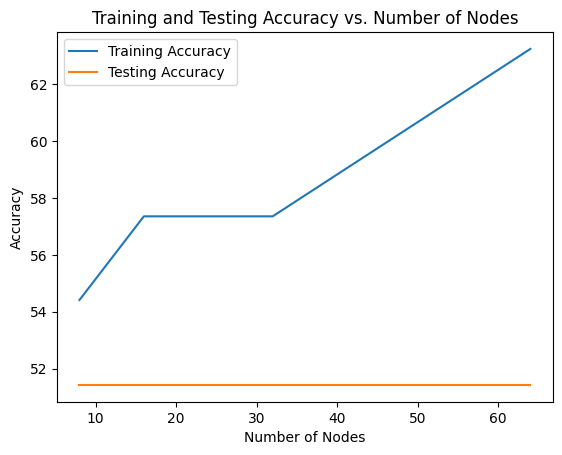

In [ ]:
import matplotlib.pyplot as plt


train_accuracies = []
test_accuracies = []

# Experiment with different number of nodes
node_list = [8,16,32,64]

for num_nodes in node_list:
    # Instantiate the ELM model with ReLU activation function
    elm_relu = ELM(X_train_scaled.shape[1], 1)

    # Add neurons with linear activation (no activation function in hidden layer)
    elm_relu.add_neurons(num_nodes, 'lin')

    # Reshape y_train to have two columns
    y_train_2d = y_train.values.reshape(-1, 1)

    # Measure training time for ReLU activation
    start_time_train_relu = time.time()

    # Train the ELM model with ReLU activation
    elm_relu.train(X_train_scaled, y_train_2d)

    # Calculate training time for ReLU activation
    training_time_relu = (time.time() - start_time_train_relu) * 100000

    # Measure testing time for ReLU activation
    start_time_test_relu = time.time()

    # Make predictions on the test set with ReLU activation
    y_test_pred_relu = elm_relu.predict(X_test_scaled)

    # Apply ReLU activation to the predictions
    y_test_pred_relu[y_test_pred_relu < 0] = 0

    # Convert predictions to binary
    y_test_pred_binary_relu = np.where(y_test_pred_relu > 0.5, 1, 0)

    # Calculate testing time for ReLU activation
    testing_time_relu = (time.time() - start_time_test_relu) * 100000

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, np.where(elm_relu.predict(X_train_scaled) > 0.5, 1, 0))*100
    test_accuracy = accuracy_score(y_test, y_test_pred_binary_relu)*100

    # Append to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print results
    print(f"Number of Nodes: {num_nodes}")
    print("Training Time (ReLU): {:.4f} ms".format(training_time_relu))
    print("Testing Time (ReLU): {:.4f} ms".format(testing_time_relu))
    print("Training Accuracy (ReLU): {:.4f}".format(train_accuracy))
    print("Testing Accuracy (ReLU): {:.4f}".format(test_accuracy))
    print("="*40)

# Plotting the graph
plt.plot(node_list, train_accuracies, label='Training Accuracy')
plt.plot(node_list, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Nodes')
plt.legend()
plt.show()